In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# sns.set_style("whitegrid")

%matplotlib inline

In [4]:
datasets = np.random.normal?

### 生成数据集

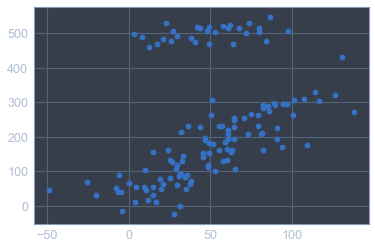

In [158]:
n_real = 100
n_fake = 30

x = np.random.uniform(low=0,high = 100,size = n_real + n_fake)

k,b = 3,7
y = k * x + b

x = np.random.normal(scale = 20,size = x.shape) + x
y = np.random.normal(scale = 20,size = y.shape) + y

# y_fake = np.random.uniform(low = 100,high = 500, size = n_fake)
y_fake = np.asarray([500] *n_fake) + np.random.normal(scale=20,size=n_fake)
y[n_real:] = y_fake

plt.scatter(x,y)

### 直线

In [160]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

temp_x = x.reshape(-1,1)
model.fit(temp_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model._

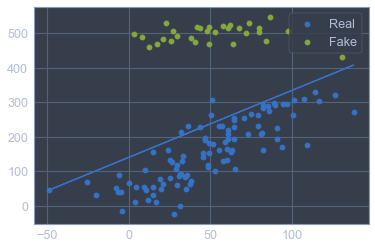

In [161]:
plt.scatter(x[:n_real],y[:n_real],label = "Real")
plt.scatter(x[n_real:],y[n_real:],label = "Fake")

result_y = list()
for i,single_x in enumerate(temp_x):
    result_y.append(model.predict([single_x]))

plt.plot(x,result_y,)
plt.legend()

### RANSAC

In [162]:
i = 0
alpha = 5 # 判断的宽限条件
best_model = None
best_fit_num = 0 #最多的拟合个数

while i < 100:
    model = LinearRegression()
    
    sample_i = np.random.choice(range(len(x)),size = 2)
    sample_x = x[sample_i]
    sample_y = y[sample_i]
    temp_x = sample_x.reshape(-1,1)
    
    model.fit(temp_x,sample_y)
    predict_y = model.predict(x.reshape(-1,1))
    
    current_fit_num = np.sum(np.abs(predict_y - y) < alpha)
    if current_fit_num > best_fit_num:
        best_model = model
        best_fit_num = current_fit_num
    
    i += 1

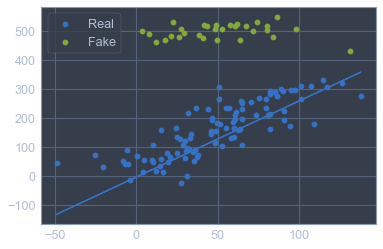

In [163]:
x = x.flatten()
plt.scatter(x[:n_real],y[:n_real],label = "Real")
plt.scatter(x[n_real:],y[n_real:],label = "Fake")

result_y = list()
temp_x = x.reshape(-1,1)
for i,single_x in enumerate(temp_x):
    result_y.append(best_model.predict([single_x]))

plt.plot(x,result_y)
plt.legend()